In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/boittier/Documents/phd/ff_energy")

from ff_energy.structure import Structure
from ff_energy.job import Job
from ff_energy.plot import plot_energy_MSE
import pandas as pd

# s = Structure("/home/boittier/charmm/mix3/jobs/pdbs/mix0.pdb")

atom_types = {
              ("LIG", "O"): "OG311",
              ("LIG", "C"): "CG331",
              ("LIG", "H1"): "HGP1",
              ("LIG", "H2"): "HGA3",
              ("LIG", "H3"): "HGA3",
              ("LIG", "H4"): "HGA3",
              # ("TIP3", "OH2"): "OT",
              # ("TIP3", "H1"): "HT",
              # ("TIP3", "H2"): "HT",
              # ("LIG", "O"): "OT",
              # ("LIG", "H1"): "HT",
              # ("LIG", "H"): "HT",
              # ("LIG", "H2"): "HT",
              }


kwargs = {"m_nproc": 4, "m_memory": 150, "m_queue": "short", 
          "m_basis": "avdz", "m_method": "run,ks,pbe0",
          "chmpath": "/home/boittier/dev-release-dcm/build/cmake/charmm",
          "modules": "module load cmake/cmake-3.23.0-gcc-11.2.0-openmpi-4.1.3",
          "c_files": ["meoh_pbe0dz.mdcm"],
          "c_dcm_command": f"open unit 11 card read name meoh_pbe0dz.mdcm \nDCM IUDCM 11 TSHIFT XYZ 15",
          }

JOBDIR = "meoh_clusters/pbe0dz"
HOMEDIR = "/home/boittier/homeb"
# HOMEDIR = "/home/boittier/pcbach"

In [2]:
from pathlib import Path
import os
PDBPATH = Path("/home/boittier/Documents/phd/projectb/meoh/pdbs/")
PDBPATH2 = Path("/home/boittier/Documents/phd/projectb/meoh/pdbsclean/")
pdbs = [_ for _ in os.listdir(PDBPATH2) if _.endswith("pdb")]
# pdbs = pdbs[:200]

In [3]:
structures = []
for p in pdbs:
    s_path = PDBPATH2 / p
    # print(s_path)
    s = Structure(s_path, atom_types=atom_types)
    # print(s.get_pdb())
    # s.save_pdb(PDBPATH2 / p)
    s.set_2body()
    structures.append(s)

In [4]:
[len(_) for _ in s.distances]
len(s.resids)/6
len(s.pairs)

15

In [5]:
for p,s in zip(pdbs, structures):
    ID = p.split(".")[0]
    j = Job(ID, f"{HOMEDIR}/{JOBDIR}/{ID}", s, kwargs=kwargs)
    # j.generate_molpro()
    j.generate_charmm()

In [4]:
# for x in *; do cd $x; cd charmm; sbatch *.slurm; cd ../..; done
# for x in *; do cd $x/monomers; for y in *.sh; do sbatch $y; done ; cd ../..; done
# for x in *; do cd $x/cluster; for y in *.sh; do sbatch $y; done ; cd ../..; done

In [105]:
mp = HOMEDIR+"/meoh_clusters/pbe0dz/{}/monomers"



In [ ]:
for p,s in zip(pdbs, structures):
    ID = p.split(".")[0]
    j = Job(ID, f"{HOMEDIR}/{JOBDIR}/{ID}", s, kwargs=kwargs)
    j.generate_coloumb_interactions(monomers_path=Path(mp.format(ID)))
    j.generate_polarization(nch_per_monomer=(3, )*20,
                           monomers_path=Path(mp.format(ID))
                           )

In [ ]:
# for x in *; do cd $x/coloumb; for y in *.sh; do sbatch $y; done ; cd ../..; done
# for x in *; do cd $x/polarization; for y in *.slurm; do sbatch $y; done ; cd ../..; done

In [ ]:
# p_data = j.gather_data()

In [126]:
mp = "/home/boittier/pcbach/meoh_clusters/pbe0dz/{}/monomers"
cp = "/home/boittier/pcbach/meoh_clusters/pbe0dz/{}/cluster"

output = []
for p in pdbs:
    s_path = PDBPATH / p
    s = Structure(s_path, atom_types=atom_types)
    s.set_2body()
    ID = p.split(".")[0]
    j = Job(ID, f"{HOMEDIR}/{JOBDIR}/{ID}", s, kwargs=kwargs)
    o = j.gather_data(
        monomers_path=Path(mp.format(ID)),
        cluster_path=Path(cp.format(ID))
    )
    output.append(o)


meoh96, could not convert string to float: 'writew'
meoh44, could not convert string to float: 'writew'
meoh62, list index out of range
meoh49, could not convert string to float: 'writew'


In [127]:
output[0]

{'charmm':            TOTAL     ELEC        VDW     KEY
 meoh45  52.95305 -2.12472  163.04276  meoh45,
 'monomers':               ENERGY       KEY
 meoh45_4 -115.602453  meoh45_4
 meoh45_1 -115.599083  meoh45_1
 meoh45_2 -115.600367  meoh45_2
 meoh45_3 -115.601254  meoh45_3
 meoh45_5 -115.600448  meoh45_5,
 'monomers_sum':             ENERGY     KEY
 meoh45 -578.003603  meoh45,
 'pairs': Empty DataFrame
 Columns: []
 Index: [],
 'cluster':                 ENERGY
 meoh45.out -578.021758,
 'polarization': None,
 'pol_total': None,
 'coloumb':                 ECOL         KEY
 meoh45_1_2 -6.345811  meoh45_1_2
 meoh45_1_4 -6.573779  meoh45_1_4
 meoh45_1_5 -0.244709  meoh45_1_5
 meoh45_1_3 -1.055524  meoh45_1_3
 meoh45_2_3  0.171233  meoh45_2_3
 meoh45_2_4 -0.378743  meoh45_2_4
 meoh45_2_5  0.024828  meoh45_2_5
 meoh45_3_4      None  meoh45_3_4
 meoh45_3_5  0.005316  meoh45_3_5
 meoh45_4_5 -0.016061  meoh45_4_5,
 'coloumb_total': None}

In [138]:
import itertools


,ENERGY
meoh45.out,-578.021758
meoh4.out,-462.411207
meoh0.out,-809.233653
meoh46.out,-346.807208
meoh81.out,-462.422563
...,...
meoh55.out,-462.418021
meoh21.out,-578.014547
meoh17.out,-346.815755
meoh64.out,-346.800608


In [141]:
cluster_df = pd.concat(list(itertools.chain([_["cluster"] for _ in output if len(_["cluster"]) > 0])))
cluster_df.describe()

,ENERGY
count,95.000000
mean,3685.219269
std,30005.442019
min,-809.233653
25%,-578.014480
50%,-462.414775
75%,-346.811797
max,262144.000000


In [121]:
pairs_df = pd.concat([_["pairs"] for _ in output])
pairs_df.head()

""


In [142]:
monomers_df = pd.concat([_["monomers_sum"] for _ in output])
monomers_df.describe()

,ENERGY
count,100.000000
mean,-488.987179
std,157.472702
min,-924.799093
25%,-577.998439
50%,-462.403351
75%,-346.802391
max,-231.193004


In [143]:
chm_df = pd.concat([_["charmm"] for _ in output])

In [144]:
chm_df

,TOTAL,ELEC,VDW,KEY
meoh45,52.95305,-2.12472,163.04276,meoh45
meoh4,45.31126,2.75129,113.12495,meoh4
meoh0,49.29229,-4.79145,224.89154,meoh0
meoh46,48.88028,3.30343,92.38744,meoh46
meoh81,43.56137,-5.28719,115.32679,meoh81
...,...,...,...,...
meoh21,42.95402,0.24189,133.14343,meoh21
meoh17,39.80943,-7.02111,84.94119,meoh17
meoh67,42.62614,-1.93517,189.91315,meoh67
meoh64,35.77021,0.16768,76.79519,meoh64


In [145]:
ctot = pd.concat([_["coloumb_total"] for _ in output])
ctot

,ECOL,KEY
meoh4,-4.979890,meoh4
meoh0,-28.732411,meoh0
meoh46,-2.170820,meoh46
meoh29,-17.858171,meoh29
meoh3,-3.381451,meoh3
meoh38,-27.724295,meoh38
meoh2,-25.891490,meoh2
meoh43,-15.247801,meoh43
meoh24,-16.661920,meoh24
meoh42,-15.162345,meoh42


42


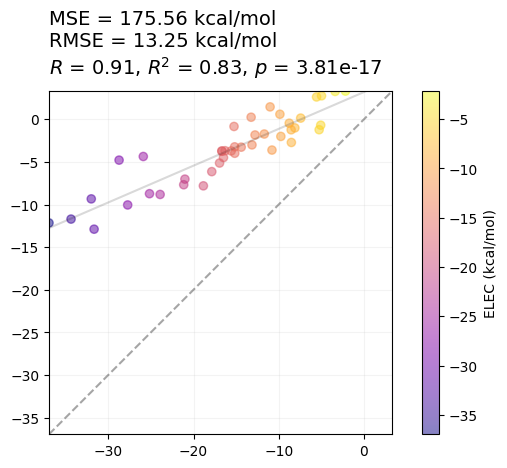

In [146]:
from ff_energy.plot import plot_energy_MSE
_ = pd.merge(ctot["ECOL"], chm_df["ELEC"], left_index=True, right_index=True)
print(len(_))
mse_df = plot_energy_MSE(_, "ECOL", "ELEC", 
                         elec="ECOL",
                         CMAP="plasma",
                        xlabel="",
                        ylabel="")

In [ ]:
_ = pd.merge(ctot["ECOL"], chm_df["ELEC"], left_index=True, right_index=True)
print(len(_))
_["Eint_chm"] = _["ELEC"] + _["VDW"]
mse_df = plot_energy_MSE(_, "Eint_chm", "ELEC", 
                         elec="ECOL",
                        xlabel="",
                        ylabel="")

In [186]:
# monomers_df.head()

In [187]:
# cluster_df["KEY"] = cluster_df.index
# cluster_df["KEY"] = cluster_df["KEY"].apply(lambda x: x.split(".")[0])
# cluster_df.head()

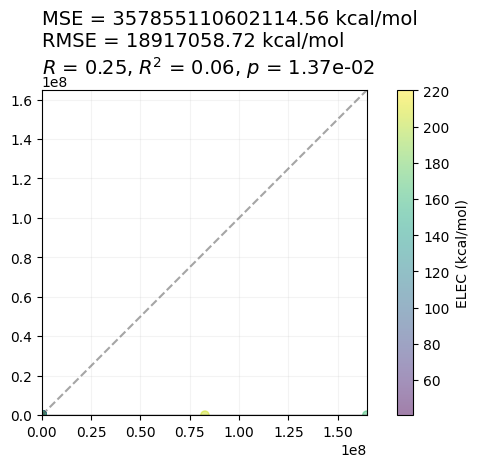

In [188]:
intE = pd.merge(cluster_df, monomers_df, on="KEY")
intE["intE"] = (intE["ENERGY_x"] -  intE["ENERGY_y"]) * 627
intE = pd.merge(intE, chm_df, on="KEY")
intE["chm_intE"] = intE["ELEC"] + intE["VDW"]

mse_df = plot_energy_MSE(intE, "intE", "chm_intE", 
                         elec="chm_intE",
                        xlabel="",
                        ylabel="")

In [191]:
mse_df.describe()


,ENERGY_x,ENERGY_y,intE,TOTAL,ELEC,VDW,chm_intE,MSE
count,95.000000,95.000000,9.500000e+01,95.000000,95.000000,95.000000,95.000000,9.500000e+01
mean,3685.219269,-469.700345,2.605135e+06,43.279499,-3.378868,116.153206,112.774339,3.578551e+14
std,30005.442019,134.695791,1.883624e+07,6.098892,3.717011,36.998573,36.118476,2.866130e+15
min,-809.233653,-809.207191,-2.102787e+01,28.376730,-12.893930,43.428200,40.708360,2.097760e+03
25%,-578.014480,-577.995907,-1.228607e+01,38.937325,-5.560150,87.733490,84.059675,8.651950e+03
50%,-462.414775,-462.402668,-9.924952e+00,43.466080,-3.611300,115.080500,113.190490,1.447094e+04
75%,-346.811797,-346.801473,-5.834871e+00,48.111140,-0.768825,140.685415,133.903915,2.214831e+04
max,262144.000000,-231.193004,1.647992e+08,58.790690,3.596470,224.891540,220.100090,2.715871e+16


In [192]:
mse_df

,ENERGY_x,KEY,ENERGY_y,intE,TOTAL,ELEC,VDW,chm_intE,MSE
0,-578.021758,meoh45,-578.003603,-11.383016,52.95305,-2.12472,163.04276,160.91804,29687.653799
1,-462.411207,meoh4,-462.404615,-4.133397,45.31126,2.75129,113.12495,115.87624,14402.313016
2,-809.233653,meoh0,-809.207191,-16.592013,49.29229,-4.79145,224.89154,220.10009,56023.151424
3,-346.807208,meoh46,-346.804237,-1.863018,48.88028,3.30343,92.38744,95.69087,9516.760994
4,-462.422563,meoh81,-462.406500,-10.071514,43.56137,-5.28719,115.32679,110.03960,14426.679596
...,...,...,...,...,...,...,...,...,...
90,-462.418021,meoh55,-462.404334,-8.582050,44.46208,-2.18151,120.00121,117.81970,15977.402393
91,-578.014547,meoh21,-578.000688,-8.689750,42.95402,0.24189,133.14343,133.38532,20185.325444
92,-346.815755,meoh17,-346.797390,-11.514598,39.80943,-7.02111,84.94119,77.92008,7998.561616
93,-346.800608,meoh64,-346.794651,-3.734907,35.77021,0.16768,76.79519,76.96287,6512.131266


In [66]:
_ = pd.concat([_["polarization"].sum() for _ in output if _["polarization"] is not None])

In [67]:
pol_df = pd.concat([_["pol_total"] for _ in output])

In [68]:
pol_df

,POL,KEY
test18,-30.392734,test18
test105,-19.980820,test105
test112,-23.962958,test112
test459,-13.112294,test459
test471,-22.074791,test471
test370,-27.885596,test370
test233,-21.589852,test233
test181,-23.432770,test181


In [15]:
#  convert molpro csv
converters = {i: lambda x: float(x.strip().replace("D","E")) * 627.503 * 10**(-3) for i in range(3,10)}
converters[0] = lambda x: x
converters[1] = lambda x: float(x.strip().replace("D","E"))
converters[2] = lambda x: float(x.strip().replace("D","E"))

#  read molpro csv
df = pd.read_csv("/home/boittier/pcbach/dimer3d/sapt.csv", converters=converters)
#  strip whitespace in column names
df = df.rename(columns=lambda x: x.strip())

In [16]:
df["KEY"] = df["KEYS"].apply(lambda x: x.strip())
df

,KEYS,RS,TS,ELST,EXCH,IND,EXIND,DISP,EXDISP,ETOT,KEY
0,1-1,0.75,180.0,-62.373121,4.056921e+02,-318.197366,2.515914e+02,-35.614933,-4.037036e-01,240.694452,1-1
1,2-1,1.00,180.0,-61.080007,1.852532e+02,-111.370336,8.627128e+01,-20.122589,3.723402e+00,82.674903,2-1
2,3-1,1.25,180.0,-36.211838,7.964523e+01,-39.555195,2.925575e+01,-11.147753,2.685490e+00,24.671678,3-1
3,4-1,1.50,180.0,-20.247849,3.307793e+01,-14.405995,9.790059e+00,-6.174418,1.462394e+00,3.502116,4-1
4,5-1,1.75,180.0,-11.790530,1.349713e+01,-5.513265,3.288282e+00,-3.447615,7.158500e-01,-3.250147,5-1
...,...,...,...,...,...,...,...,...,...,...,...
107,12-5,3.50,90.0,-0.913704,2.024254e-02,-0.046512,2.525937e-03,-0.113131,2.312804e-03,-1.048266,12-5
108,13-5,4.25,90.0,-0.473149,1.119777e-03,-0.014520,1.380030e-04,-0.038197,1.642618e-04,-0.524445,13-5
109,14-5,5.00,90.0,-0.270115,5.359255e-05,-0.005766,9.085400e-06,-0.015719,1.147403e-05,-0.291525,14-5
110,15-5,7.00,90.0,-0.081262,-5.079888e-07,-0.000868,5.742869e-07,-0.002505,1.499236e-07,-0.084635,15-5


In [17]:
# pol_3d = pd.merge(df, pol_df, on="KEY")
pol_3d = pd.merge(pol_df, ctot)
pol_3d = pd.merge(pol_3d, chm_df)
pol_3d

,POL,KEY,ECOL,TOTAL,ELEC,VDW
0,-27.025564,test306,-135.196597,20.70498,-72.67386,14.61751
1,-21.739503,test324,-124.059901,19.58474,-66.35907,13.76964
2,-30.392734,test18,-175.888945,22.99407,-89.90791,22.64238
3,-19.980820,test105,-132.517714,23.47499,-53.94989,22.92519
4,-23.962958,test112,-132.383073,23.48549,-66.54650,19.95412
5,-13.112294,test459,-77.487531,21.62610,-36.64205,7.38603
6,-22.074791,test471,-127.464211,22.27065,-61.37597,14.54395
7,-27.885596,test370,-171.027090,19.93028,-79.50871,28.39050
8,-21.589852,test233,-122.430321,22.72917,-68.96566,10.26162
9,-23.432770,test181,-135.312473,24.05006,-71.56907,18.55929


KeyError: 'TS'

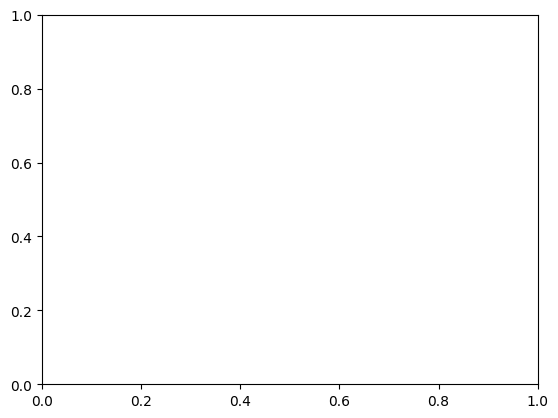

In [18]:
import matplotlib.pyplot as plt
import numpy as np

TS = list(set(df["TS"]))
TS.sort()
colors = plt.cm.plasma_r(np.linspace(0, 1, len(TS)))

ax = plt.figure().add_subplot()

    tmp = pol_3d[pol_3d["TS"] == ts]
    tmp = tmp[tmp["RS"] > 0]
    # ax.plot(tmp["RS"], tmp["ETOT"] - tmp["ELST"], "-o",  c=colors[i])
    ax.plot(tmp["RS"], tmp["POL"], "-o",  c=colors[i])
    
plt.ylim(-.1,0)
# plt.yscale("log")
plt.axhline(0, c="k", linewidth=0.1)
plt.xlim(1,8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


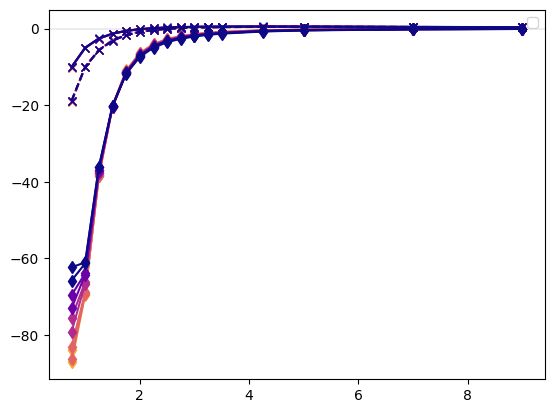

In [49]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.plasma_r(np.linspace(0, 1, len(TS)))
TS = list(set(df["TS"]))
TS.sort()

ax = plt.figure().add_subplot()

for i, ts in enumerate(TS):
    tmp = pol_3d[pol_3d["TS"] == ts]
    tmp = tmp[tmp["RS"] > 0]
    # ax.plot(tmp["RS"], tmp["ETOT"] - tmp["ELST"], "-o",  c=colors[i])
    ax.plot(tmp["RS"], tmp["ECOL"], "-d",  c=colors[i])
    ax.plot(tmp["RS"], tmp["ELST"], "-d",  c=colors[i])
    ax.plot(tmp["RS"], tmp["ELEC"], "-x",  c=colors[i])
    ax.plot(tmp["RS"], tmp["ELEC"] + tmp["POL"], "--x",  c=colors[i])
    
plt.legend()
# plt.ylim(-10,0)
plt.axhline(0, c="k", linewidth=0.1)
# plt.xlim(1.5,3)

In [50]:
j.kwargs

{'m_nproc': 4,
 'm_memory': 480,
 'm_queue': 'short',
 'm_basis': 'avdz',
 'm_method': 'run,ks,pbe0',
 'chmpath': '/home/boittier/dev-release-dcm/build/cmake/charmm',
 'modules': 'module load cmake/cmake-3.23.0-gcc-11.2.0-openmpi-4.1.3',
 'c_files': ['pbe0_dz.pc'],
 'c_dcm_command': 'open unit 11 card read name pbe0_dz.pc \nDCM IUDCM 11 TSHIFT XYZ 15'}

In [19]:
pol_3d["ELECpol"] = pol_3d["ELEC"] + pol_3d["POL"]

KeyError: 'ELST'

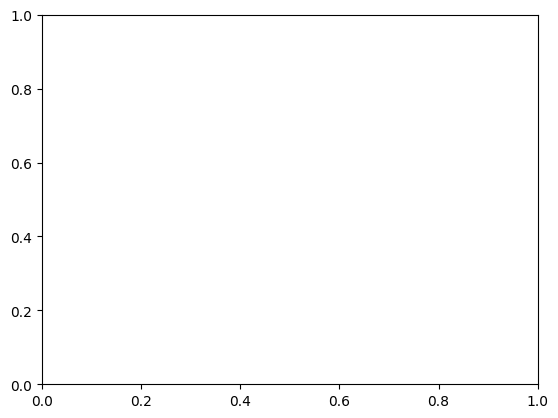

In [20]:
plot_energy_MSE(pol_3d, "ECOL", "ELST", 
                elec="ECOL", CMAP="plasma",
               xlabel="Coulomb integral [kcal/mol]",
               ylabel="SAPT-ELEC [kcal/mol]")

plt.savefig("sapt_vs_ci.pdf", bbox_inches="tight")

(-180.0, 0.0)

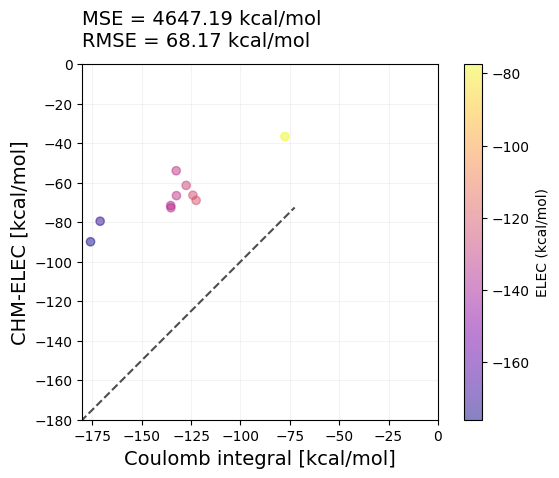

In [26]:
plot_energy_MSE(pol_3d, "ECOL", "ELEC", 
                elec="ECOL", CMAP="plasma",
               xlabel="Coulomb integral [kcal/mol]",
               ylabel="CHM-ELEC [kcal/mol]")
plt.savefig("chm_vs_ci.pdf", bbox_inches="tight")
plt.xlim(-180,0)
plt.ylim(-180,0)

(-180.0, 0.0)

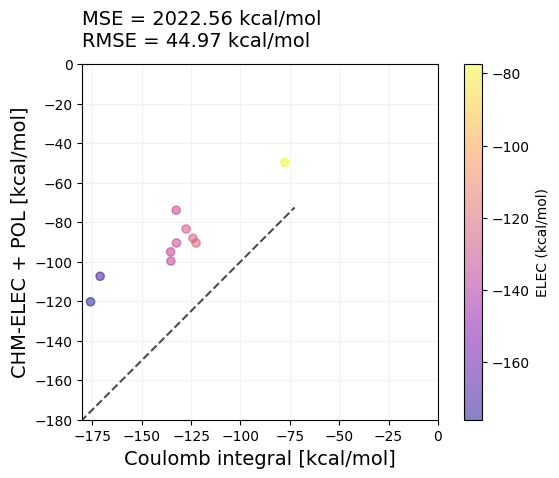

In [25]:
plot_energy_MSE(pol_3d, "ECOL", "ELECpol", 
                elec="ECOL", CMAP="plasma",
               xlabel="Coulomb integral [kcal/mol]",
               ylabel="CHM-ELEC + POL [kcal/mol]")
plt.savefig("chm_pol_vs_ci.pdf", bbox_inches="tight")
plt.xlim(-180,0)
plt.ylim(-180,0)